# Overview

This notebook walks through the process of disaggregating DRB demand data to the nodes of interest. 



In [29]:
# Standard libraries
import pandas as pd

# Geospatial libraries
import geopandas as gpd

# Data acquisition libraries
from pynhd import NLDI

# Step 0: Load data

Load Pywr-DRB nodes.

Load Pywr-DRB USGS data sources, and unpack the list where multiple gauges are listed for a single node. 


In [30]:
### Load data
# Constants
crs = 4386

# Pywr nodes
nodes = pd.read_csv('./model_components/drb_nodes.csv', sep = ',', index_col=0)
drb_boundary = gpd.read_file('DRB_shapefiles/drb_bnd_polygon.shp')
drb_boundary = drb_boundary.to_crs(crs)

nodes.head(1)

,lat,long,comid
name,,,
cannonsville,42.065872,-75.37462,2614136


In [31]:
nldi = NLDI()

# Get basin geometry
node_basins = nldi.get_basins(list(nodes['comid'].values), fsource='comid', split_catchment = True)
node_basins.index.name = 'comid'

nodes = pd.merge(nodes.reset_index(), node_basins, on = 'comid')
nodes.head(1)

,name,lat,long,comid,geometry
0,cannonsville,42.065872,-75.37462,2614136,"POLYGON ((-75.25964 42.07860, -75.25913 42.075..."


In [32]:
geo_nodes = gpd.GeoDataFrame(nodes, geometry=nodes['geometry'], crs = crs)
geo_nodes.columns = ['node', 'lat', 'long', 'comid', 'geometry']
geo_nodes.head(1)

,node,lat,long,comid,geometry
0,cannonsville,42.065872,-75.37462,2614136,"POLYGON ((-75.25964 42.07860, -75.25913 42.075..."


In [33]:
# Export
geo_nodes.to_file("./DRB_shapefiles/node_basin_geometries.shp")

<AxesSubplot: >

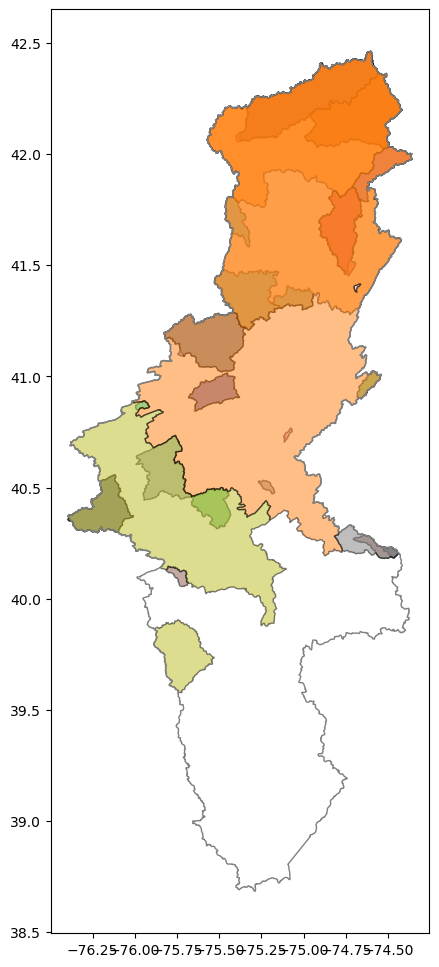

In [34]:
# Visualize
ax =geo_nodes.plot(column = 'node', edgecolor = 'black', alpha = 0.5, figsize=(8,12))
drb_boundary.plot(ax=ax, color = 'none', edgecolor = '0.5')